In [76]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [77]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [78]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

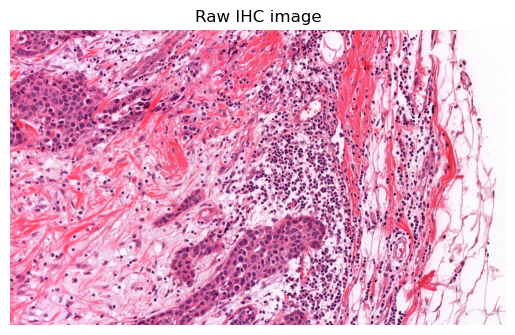

In [79]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [80]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[250.25185185  76.92407407 114.75925926]
[73.24444444 17.88888889 83.01111111]
[253.04947653 252.99819881 253.87267815]


### Inspect ROIs of stains and background to ensure correct stain color selection

#fa4c72
#491153
#fdfcfd


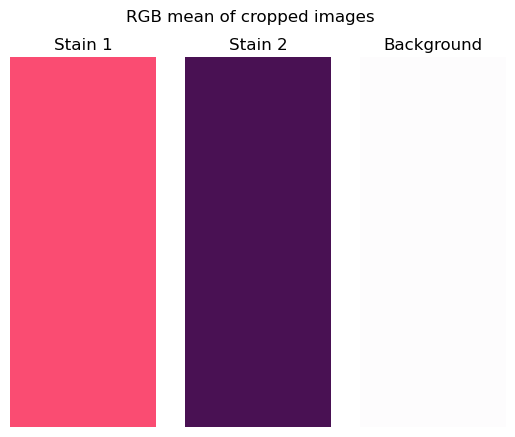

In [81]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [82]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.00482814 0.51705515 0.34482823]
[0.53843075 1.15053406 0.48547974]


### Normalize the absorbances to vector lengths

In [83]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.00933777 1.         0.66690802]
[0.46798332 1.         0.42196033]


### Form a deconvolution matrix

In [84]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.00933777 0.46798332]
 [1.         1.        ]
 [0.66690802 0.42196033]]
M transposed
[[-1.61140811  0.30461144  1.06526762]
 [ 1.81803176  0.43544127 -0.67838087]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -6.66133815e-16]
 [ 2.22044605e-16  1.00000000e+00]]
Deconvolution matrix, D
[[-1.61140811  0.30461144  1.06526762]
 [ 1.81803176  0.43544127 -0.67838087]]


### Calculate the coefficient for each stain 

In [85]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [86]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log(T_img_ihc)

#reshape OD matrix into (#pixels x 3)
OD_reshaped = OD_img_ihc.reshape(-1, 3)

#Coefficient matrix
coeffs = np.dot(OD_reshaped, D.T)

#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
coeff_stain1 = coeffs[:,0]
coeff_stain2 = coeffs[:,1]

# Reshape the coefficients to match the original image dimensions
original_height = img_ihc.shape[0]
original_width = img_ihc.shape[1]
coeff_stain1 = coeff_stain1.reshape(original_height, original_width)
coeff_stain2 = coeff_stain2.reshape(original_height, original_width)

#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(2309, 3877)
(2309, 3877)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [87]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[-0.08786614, -0.18775486, -0.0792251 ],
        [-0.08122127, -0.17355591, -0.07323371],
        [-0.05910242, -0.12629172, -0.05329009],
        ...,
        [-0.00205051, -0.00438158, -0.00184885],
        [-0.01244748, -0.02659813, -0.01122336],
        [-0.00205051, -0.00438158, -0.00184885]],

       [[-0.15760649, -0.33677801, -0.14210696],
        [-0.11212014, -0.23958148, -0.10109388],
        [-0.06153738, -0.13149482, -0.0554856 ],
        ...,
        [-0.00373474, -0.00798051, -0.00336746],
        [-0.0089908 , -0.0192118 , -0.00810662],
        [-0.00185909, -0.00397257, -0.00167627]],

       [[-0.16192976, -0.3460161 , -0.14600507],
        [-0.11266327, -0.24074206, -0.1015836 ],
        [-0.069061  , -0.14757149, -0.06226932],
        ...,
        [-0.00373474, -0.00798051, -0.00336746],
        [-0.00486964, -0.01040558, -0.00439074],
        [-0.00486964, -0.01040558, -0.00439074]],

       ...,

       [[-0.02742002, -0.05859188, -0.02472345],
        [-0

### Convert the image absorbance to image transmittance  

In [88]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

array([[[1.22423881, 1.54083047, 1.20012119],
        [1.20565006, 1.49126872, 1.18367836],
        [1.14578311, 1.33749361, 1.13055083],
        ...,
        [1.00473263, 1.01014002, 1.00426621],
        [1.02907608, 1.06315878, 1.02617955],
        [1.00473263, 1.01014002, 1.00426621]],

       [[1.4374955 , 2.1715909 , 1.38709742],
        [1.2945539 , 1.73612695, 1.26210033],
        [1.15222524, 1.35361395, 1.13628062],
        ...,
        [1.00863665, 1.01854567, 1.007784  ],
        [1.02091786, 1.04522985, 1.01884148],
        [1.0042899 , 1.00918913, 1.0038672 ]],

       [[1.45187679, 2.21827864, 1.39960366],
        [1.29617389, 1.74077267, 1.2635243 ],
        [1.17236001, 1.4046609 , 1.15416876],
        ...,
        [1.00863665, 1.01854567, 1.007784  ],
        [1.01127585, 1.02424907, 1.01016134],
        [1.01127585, 1.02424907, 1.01016134]],

       ...,

       [[1.06517269, 1.14443697, 1.05857943],
        [1.07281305, 1.16204955, 1.06542336],
        [1.06200254, 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [89]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [90]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Visualize deconvolved images

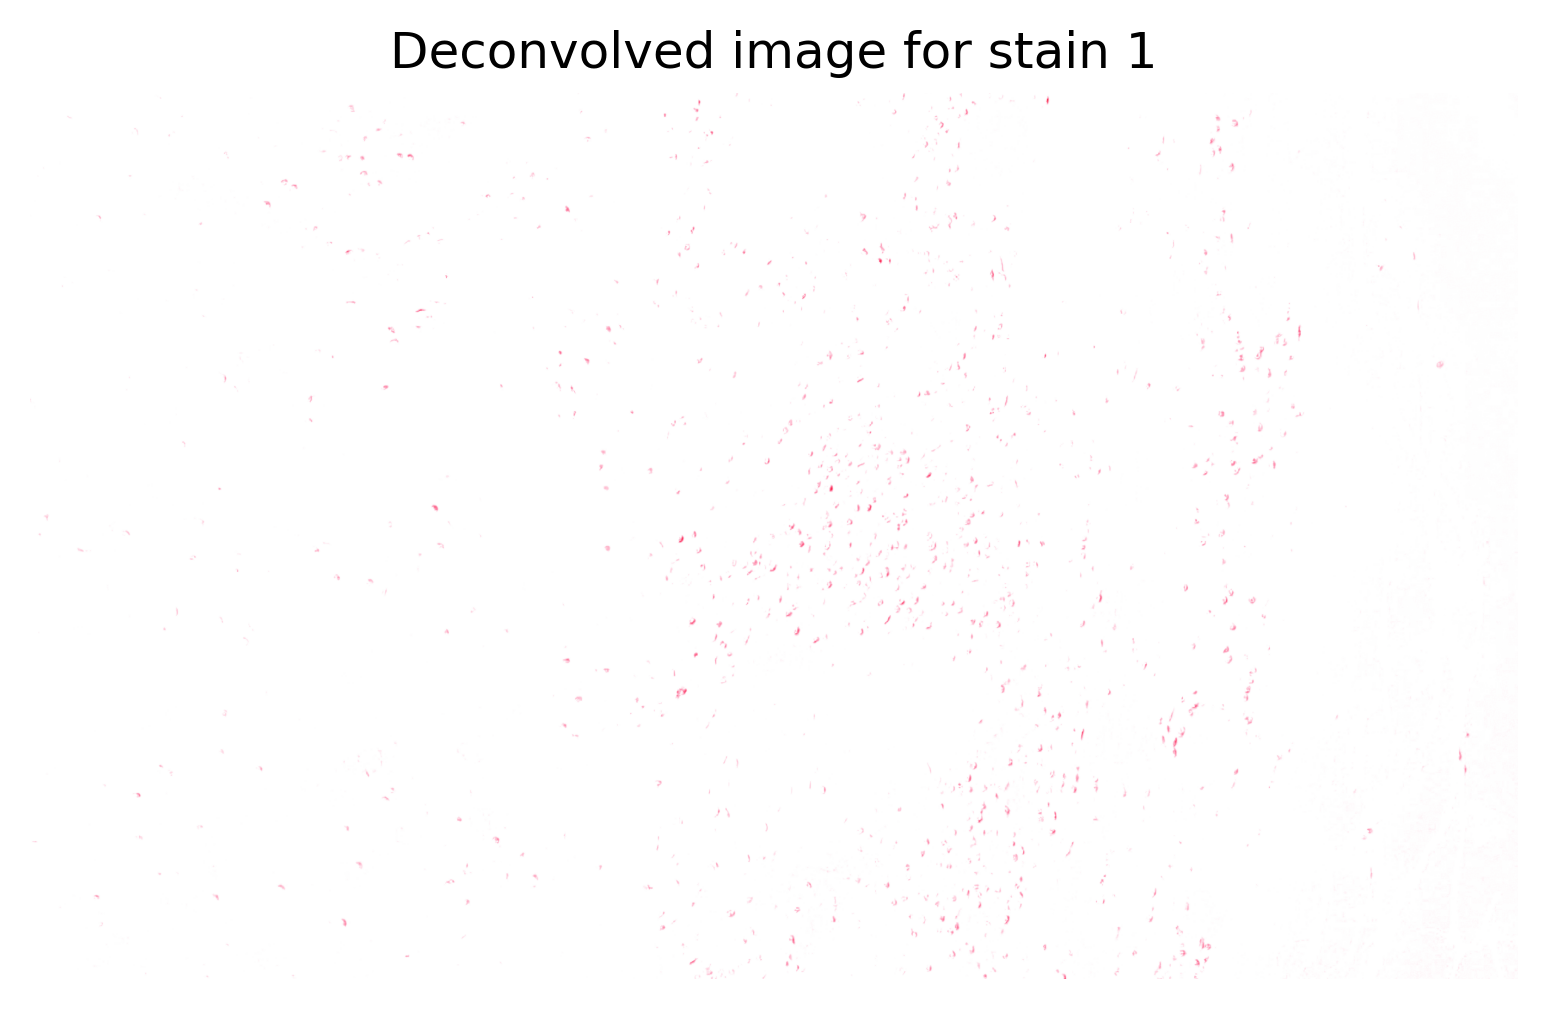

In [91]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

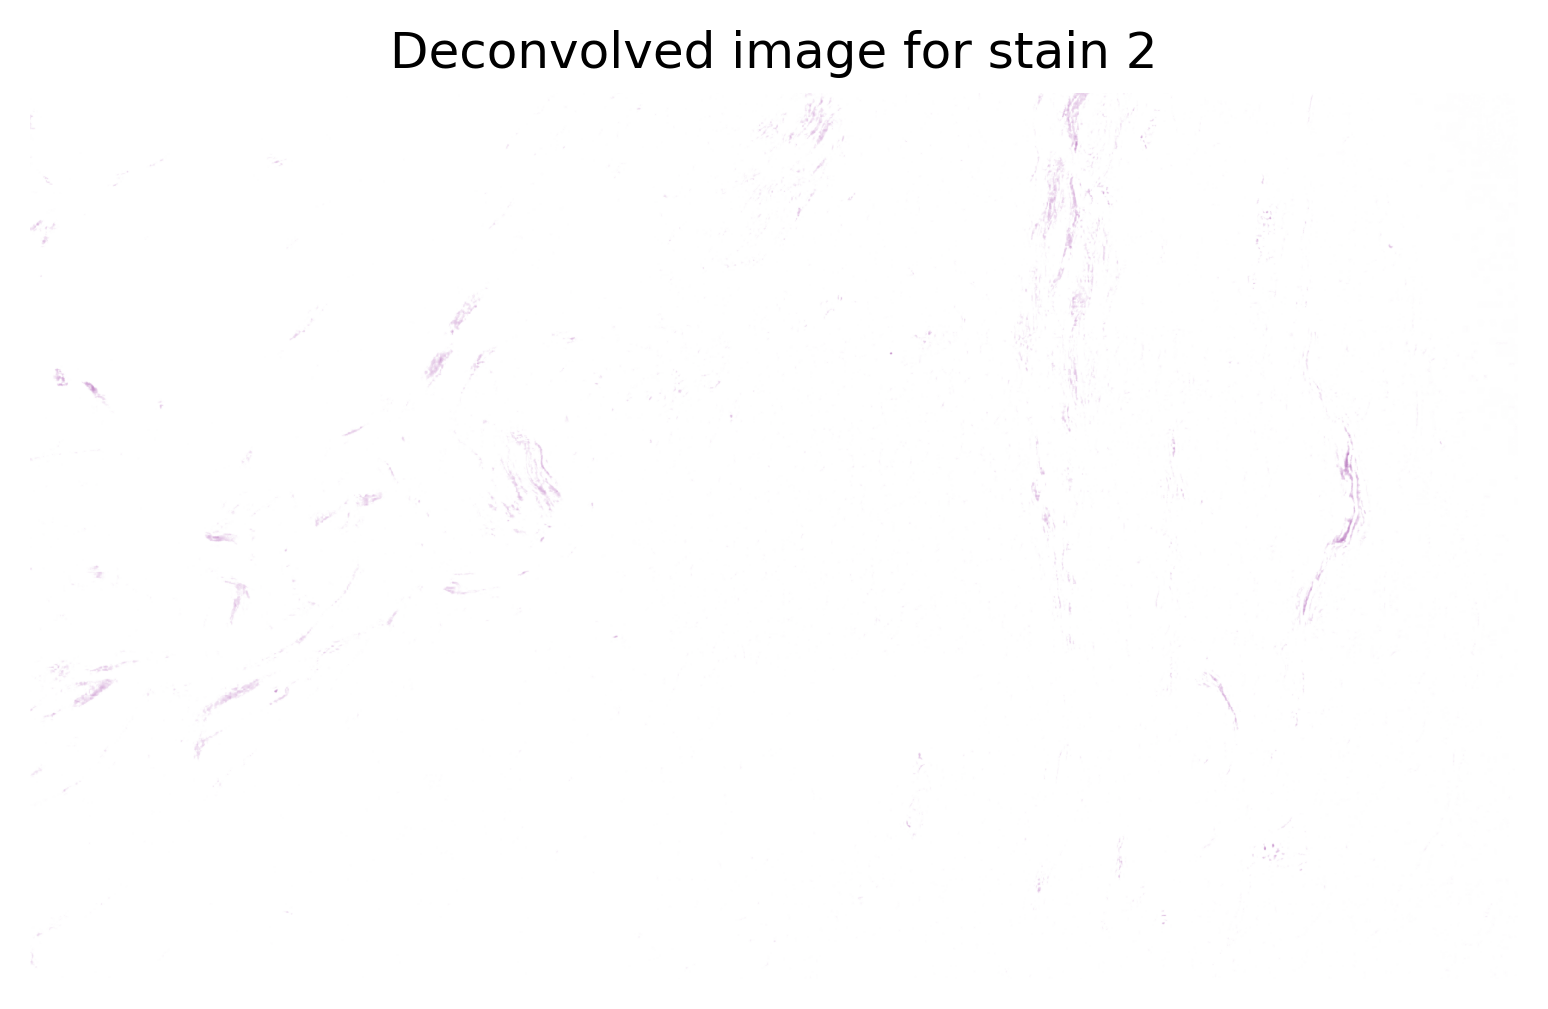

In [92]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')

In [93]:
print("Coefficients for stain 1:", coeff_stain1)
print("Coefficients for stain 2:", coeff_stain2)

Coefficients for stain 1: [[-8.96984150e-01 -8.55249799e-01 -8.10515942e-01 ... -2.10029996e-03
   4.98286671e-04 -2.10029996e-03]
 [-7.86806929e-01 -7.13738095e-01 -6.81468027e-01 ... -4.85229966e-03
   3.64801637e-04 -2.41539515e-03]
 [-7.34386438e-01 -6.40742028e-01 -6.09924306e-01 ... -4.85229966e-03
  -5.76300667e-03 -5.76300667e-03]
 ...
 [-8.52541173e-01 -8.04723110e-01 -7.52204778e-01 ...  1.62492202e-02
   1.93672742e-02  4.28152268e-03]
 [-8.32779029e-01 -7.88865039e-01 -7.49258578e-01 ...  1.46845914e-02
   1.62492202e-02  1.46845914e-02]
 [-8.26294480e-01 -7.78946210e-01 -7.33481422e-01 ...  1.46845914e-02
   9.47270507e-03  4.28152268e-03]]
Coefficients for stain 2: [[-0.16318931 -0.15084813 -0.10976791 ... -0.0038083  -0.02311807
  -0.0038083 ]
 [-0.29271451 -0.20823502 -0.11429025 ... -0.00693635 -0.01669816
  -0.0034528 ]
 [-0.3007439  -0.20924375 -0.12826347 ... -0.00693635 -0.00904413
  -0.00904413]
 ...
 [-0.05092581 -0.05669076 -0.04852167 ... -0.03568143 -0.0549258